In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score,classification_report
from xgboost import XGBRegressor
from IPython.display import Image
!pip install pydotplus
import pydotplus
import graphviz
from six import StringIO

import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO

from pydot import graph_from_dot_data
from sklearn.utils import resample



from sklearn.tree import export_graphviz
import pydot
import random


In [ ]:
df = pd.read_csv("/content/investments_VC.csv",encoding="ISO-8859-1")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [ ]:
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(54294, 39)

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                

In [ ]:
df = df.rename(columns={' market ': "market", ' funding_total_usd ': "funding_total_usd"})

df['funding_total_usd'] = df['funding_total_usd'].astype(str).str.replace(',', '')
df['funding_total_usd'] = df['funding_total_usd'].str.replace(' ', '')
df['funding_total_usd'] = df['funding_total_usd'].str.replace('-', '0')
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')  # Converts to numeric, handling errors

df = df.rename(columns=lambda x: x.strip())  # Removes extra spaces from column names
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces from all column names
print(df.columns)
#df['founded_at'] =  pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors = 'coerce') # conveting column into date and ignoring errors
df['founded_at'] = pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors='coerce')

df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors='coerce')
df['founded_year'] = pd.to_datetime(df['founded_year'], format='%Y', errors='coerce')
df['founded_month'] = pd.to_datetime(df['founded_month'], format='%Y-%m', errors='coerce')
df['market'] = df['market'].astype(str).str.strip()

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')


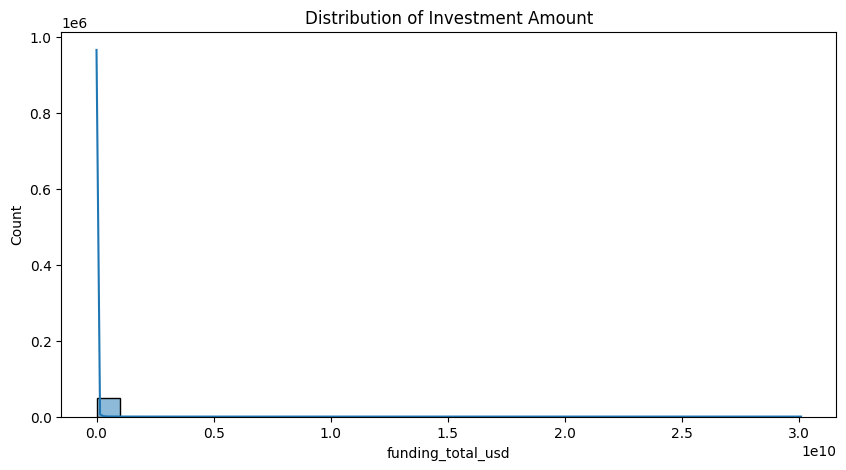

In [ ]:
# Drop 'Startup Name' if it exists
if 'Startup Name' in df.columns:
    df = df.drop(columns=['Startup Name'])

# Data Visualization
plt.figure(figsize=(10, 5))
sns.histplot(df['funding_total_usd'], bins=30, kde=True)
plt.title("Distribution of Investment Amount")
plt.show()


In [ ]:
# Feature Engineering
current_year = 2025
df['Startup Age'] = current_year - df['founded_at'].dt.year

df_encoded = pd.get_dummies(df, columns=['market', 'country_code'], drop_first=True)
scaler = MinMaxScaler()
df_encoded[['funding_total_usd']] = scaler.fit_transform(df_encoded[['funding_total_usd']])

important_features = ['funding_rounds', 'Startup Age', 'funding_total_usd']
X = df_encoded[important_features]
y = df_encoded['funding_rounds']

In [ ]:
print(f"NaN values in y_train: {y_train.isna().sum()}")


NameError: name 'y_train' is not defined

In [ ]:
df['Startup Age'] = current_year - df['founded_at'].dt.year

df_encoded = pd.get_dummies(df, columns=['market', 'country_code'], drop_first=True)
scaler = MinMaxScaler()
df_encoded[['funding_total_usd']] = scaler.fit_transform(df_encoded[['funding_total_usd']])

important_features = ['funding_rounds', 'Startup Age', 'funding_total_usd']
X = df_encoded[important_features]
y = pd.to_numeric(df_encoded['funding_rounds'], errors='coerce')

# Remove NaN and infinite values from y
y.replace([np.inf, -np.inf], np.nan, inplace=True)
y.dropna(inplace=True)

In [ ]:
# Ensure X and y have the same length
valid_indices = y.dropna().index
X = X.loc[valid_indices]
y = y.loc[valid_indices]

In [ ]:
# Split data into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"NaN values in y_train: {y_train.isna().sum()}")
print(f"Any Inf values in y_train: {np.isinf(y_train).sum()}")

# Train Optimized XGBoost Model
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)

xgb_model.fit(X_train, y_train)

NaN values in y_train: 0
Any Inf values in y_train: 0


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test)


# Evaluate model on Testing Data
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"Testing Mean Absolute Error: {mae_xgb}")
print(f"Testing R² Score: {r2_xgb}")

# Evaluate model on Training Data
y_train_pred = xgb_model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f"Training Mean Absolute Error: {mae_train}")
print(f"Training R² Score: {r2_train}")

# Calculate Accuracy
train_accuracy = np.mean(np.round(y_train_pred) == y_train)
test_accuracy = np.mean(np.round(y_pred_xgb) == y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Classification Report
y_test_rounded = np.round(y_test)
y_pred_rounded = np.round(y_pred_xgb)
print("Classification Report (Testing):")
print(classification_report(y_test_rounded, y_pred_rounded))


Testing Mean Absolute Error: 0.05773702549558241
Testing R² Score: 0.9939058370325249
Training Mean Absolute Error: 0.058366774017681214
Training R² Score: 0.9943135378580751
Training Accuracy: 0.9959039190897598
Testing Accuracy: 0.9977750809061489
Classification Report (Testing):
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      6465
         2.0       0.99      1.00      1.00      1859
         3.0       0.99      1.00      1.00       768
         4.0       1.00      1.00      1.00       425
         5.0       1.00      1.00      1.00       177
         6.0       1.00      1.00      1.00        98
         7.0       0.96      1.00      0.98        43
         8.0       0.96      0.92      0.94        26
         9.0       0.90      0.90      0.90        10
        10.0       1.00      0.92      0.96        12
        11.0       0.75      1.00      0.86         3
        12.0       1.00      0.50      0.67         2

    accuracy 

In [ ]:
import joblib
joblib.dump(xgb_model, "xgb_startup_success_model.pkl")

['xgb_startup_success_model.pkl']